# LogisticRegression_PRML_MNIST

- MNIST (Mixed National Institute of Standards and Technology database)
- MNIST is a data set of 70,000 handwritten digits numbered 0–9. No two handwritten digits are the same, and some can be very hard to correctly classify.
- The human benchmark for classifying MNIST is about 97.5% accuracy, so our goal is to beat that!

In [2]:
from sklearn.datasets import fetch_openml

In [4]:
digits = fetch_openml('mnist_784', version = 1)

In [ ]:
dir(digits)

In [34]:
digits.data.shape
print("There are 70,000 pictures, each has 784 features")

There are 70,000 pictures, each has 784 features


In [32]:
digits.url

'https://www.openml.org/d/554'

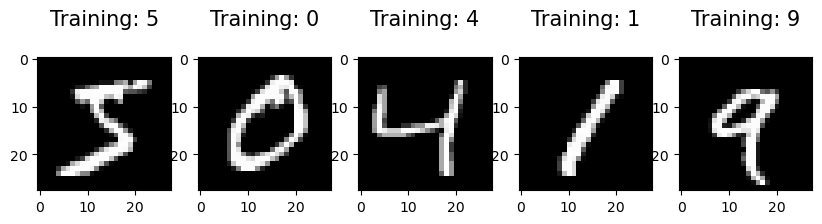

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
for idx in range(5):
    image = digits.data.iloc[idx,:]
    label = digits.target[idx]
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % int(label), fontsize = 15)

- Show the corresponding Matrix

In [31]:
digits.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Hey there, what does this line do?
np.array(digits.data.iloc[9,:]).reshape(28, 28)

In [36]:
28*28

784

In [35]:
digits.data.iloc[9,:]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 9, Length: 784, dtype: int64

In [39]:
print("Reshape into a matrix, 28 by 28 square")
np.array(digits.data.iloc[9,:]).reshape(28, 28)

Reshape into a matrix, 28 by 28 square


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

# 3.3 Understand the data

- All the images in the MNIST dataset are of 28x28 pixels black & white(grayscale). 
- So there are 28x28=784 pixels per image is to be processed.
- And each pixel values ranges from 0 to 255. Where 0 represent Black color and 255 represent White color. 
- The color gets lighter as we go from 0 to 255. 
- The combination of such pixel values make an image.

# 4. Build a Logistic model to classify MNIST images

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix, classification_report

In [47]:
# Select Target variables
y = digits.target
y[9]
len(y)

70000

In [49]:
# Prepare Data
n_samples = digits.data
len(n_samples)

70000

In [51]:
X = digits.data
len(X)

70000

In [52]:
# Split into training and testing datasets
X_Train, X_Test, y_Train, y_Test = train_test_split(digits.data, digits.target, train_size=0.8, random_state=0)

In [ ]:
# 4.5 - !! potentially a missed typed line: regarding Linear vs Logistic
# Limited-memory Broyden-Fletcher-Goldfarb-Shanno

logreg = LogisticRegression(solver='lbfgs',max_iter=10000).fit(X_Train, y_Train)

In [ ]:
logreg.fit(X_Train, y_Train)

In [62]:
y_prediction = logreg.predict(X_Train)

In [63]:
y_prediction

array(['4', '9', '6', ..., '7', '1', '1'], dtype=object)

In [66]:
logreg.score(X_Train, y_Train)

0.9466607142857143

In [67]:
logreg.score(X_Test, y_Test)

0.9095714285714286

In [ ]:
logreg100 = LogisticRegression(max_iter=100, C=100).fit(X_Train, y_Train)

In [73]:
logreg100.score(X_Train, y_Train)

0.935875

# Confusion Matrix

In [81]:
y_prediction = logreg.predict(X_Test)
logreg.score(X_Train, y_Train)
logreg.score(X_Test, y_Test)

0.9095714285714286

In [79]:
confusion_matrix(y_Test, y_prediction)

array([[1336,    0,    8,    1,    4,    9,   16,    3,    7,    3],
       [   0, 1531,    9,    6,    3,    7,    2,    4,   15,    3],
       [  12,   22, 1270,   24,   16,    8,   25,   16,   44,    6],
       [   5,    6,   49, 1254,    2,   47,    2,   17,   39,   14],
       [   3,    3,   12,    3, 1241,    4,   16,   15,    7,   46],
       [  14,    9,   14,   40,   13, 1057,   26,    6,   40,   12],
       [  16,    4,   15,    3,   17,   24, 1300,    0,    7,    1],
       [   5,    7,   21,    6,   12,    5,    1, 1331,    8,   62],
       [   6,   23,   12,   35,   10,   40,   14,    2, 1207,   19],
       [   3,    5,    8,   19,   49,   10,    1,   47,   12, 1207]],
      dtype=int64)

In [ ]:
confusion_matrix()

# Visualise the prediction

In [83]:
images_and_predictions = list(zip(digits.data, logreg.predict(X)))

In [ ]:
plt.figure(figsize=(10,2))
for idx in range(5):
    image = digits.data.iloc[idx,:]
    prediction = logreg.predict(X)[idx]
    plt.subplot(1,5,idx+1)
    plt.axis("off")
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % int(prediction))
    plt.show()

# Display misclassified images

In [89]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_Test, y_prediction):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

In [90]:
misclassifiedIndexes[:5]

[4, 5, 9, 18, 61]

In [91]:
y_prediction[4]

'4'

In [ ]:
plt.figure(figsize=(20,3))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(np.array(X_Test.iloc[badIndex, :]).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Predicted: {}, Actual: {}'.format(y_prediction[badIndex], np.array(y_Test)[badIndex]), fontsize = 20)